<a href="https://colab.research.google.com/github/Shahidpathan22/Demo/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder with label classes (assuming binary classification with '0' and '1')
labels = [[0], [1]]  # Adjust this list depending on your dataset (e.g., 0 = 'yes', 1 = 'no')
encoder.fit(labels)

# Initialize data and result as empty lists
data = []
result = []

# Process images from the "yes" folder (images with tumor)
yes_paths = []
for r, d, f in os.walk(r"/content/drive/My Drive/brain_tumor_dataset/yes"):
    for file in f:
        if '.jpg' in file:
            yes_paths.append(os.path.join(r, file))

print(f"Found {len(yes_paths)} images in the 'yes' directory.")

# Process images for 'yes' label
for path in yes_paths:
    img = Image.open(path)
    img = img.resize((128, 128))  # Resize to 128x128
    img = np.array(img)  # Convert image to numpy array

    if img.shape == (128, 128, 3):  # Ensure the image has 3 channels (RGB)
        data.append(np.array(img))  # Append the image to the data list
        result.append(encoder.transform([[0]]))  # Encode the label for 'yes' (0)

print(f"Processed {len(data)} 'yes' images.")

# Process images from the "no" folder (images without tumor)
no_paths = []
for r, d, f in os.walk(r"/content/drive/My Drive/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            no_paths.append(os.path.join(r, file))

print(f"Found {len(no_paths)} images in the 'no' directory.")

# Process images for 'no' label
for path in no_paths:
    img = Image.open(path)
    img = img.resize((128, 128))  # Resize to 128x128
    img = np.array(img)  # Convert image to numpy array

    if img.shape == (128, 128, 3):  # Ensure the image has 3 channels (RGB)
        data.append(np.array(img))  # Append the image to the data list
        result.append(encoder.transform([[1]]))  # Encode the label for 'no' (1)

print(f"Processed {len(data)} 'no' images.")

# Convert data to numpy array
data = np.array(data)
result = np.array(result)

# Display shape
print(f"Data shape: {data.shape}")


Found 86 images in the 'yes' directory.
Processed 70 'yes' images.
Found 85 images in the 'no' directory.
Processed 139 'no' images.
Data shape: (139, 128, 128, 3)


In [36]:
print(f'Total number of images we have: {len(data)}')

Total number of images we have: 139


In [37]:
result = np.array(result)
result = result.reshape(139,2)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [39]:
print(f'Number of images in training data: {len(x_train)}')

Number of images in training data: 111


In [40]:
print(f'Number of images in testing data: {len(x_test)}')

Number of images in testing data: 28


In [41]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [43]:
y_train.shape

(111, 2)

In [42]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 8s/step - loss: 10.2127 - val_loss: 36.3567
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - loss: 10.6894 - val_loss: 14.0094
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - loss: 4.4959 - val_loss: 8.4672
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - loss: 4.1359 - val_loss: 14.6773
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - loss: 1.4655 - val_loss: 13.8230
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - loss: 2.0210 - val_loss: 10.1866
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - loss: 0.9186 - val_loss: 8.7110
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - loss: 1.1194 - val_loss: 8.5463
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - loss: 0.3962 - val_loss: 8.4686
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - loss: 0.1614 - val_loss: 8.4601
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - loss: 0.3212 - val_loss: 7.6767
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - loss: 0.3727 - val_loss: 6.5172
Epoch 1

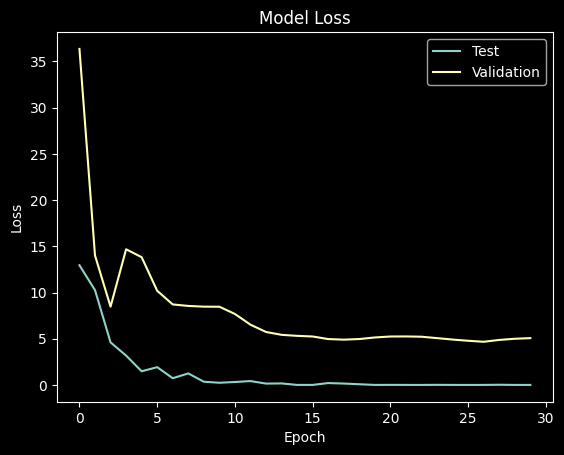

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [45]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

99.96742010116577% Confidence This Is No, Its not a tumor


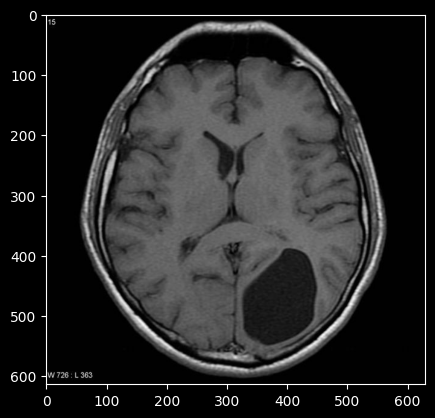

In [46]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/My Drive/brain_tumor_dataset/no/N11.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


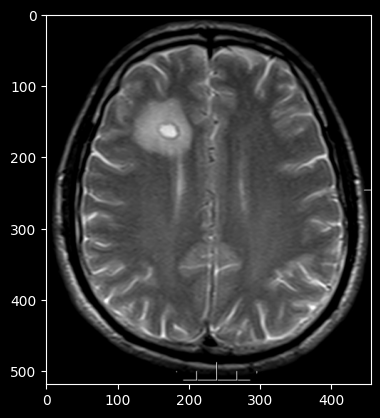

In [47]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/My Drive/brain_tumor_dataset/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

In [48]:
#@title A title for the app:
heading_title = "Brain tumor classification app" # @param {type:"string"}

In [49]:
#@title You can add some example images that you want to be present in your app by default. The user can see use these images to quickly and easily test the model. How many example images do you want to load?
num_examples = 2 # @param {type:"slider", min:1, max:6, step:1}

example_path_1:  /content/drive/My Drive/brain_tumor_dataset/no/N11.jpg
example_path_2:  /content/drive/My Drive/brain_tumor_dataset/yes/Y3.jpg


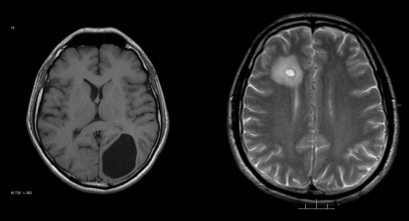

In [50]:
#@title Enter the paths for the example images that you want displayed in your app by default. The user can use these images to quickly and easily test the model. Note: You can get the path for the file from the left sidebar. Simply run the code below, select the image file you want to include from its folder, right-click and select 'Copy path'. Then paste the path in the input box displayed:
from matplotlib import pyplot as plt
from PIL import Image

examples=[]
for i in range(num_examples):
  example_path = input(f"example_path_{i+1}:  ")
  examples.append(example_path)

#Displaying the selected images side by side
rows = 1
plt.figure(figsize=(16, 8))
for num, x in enumerate(examples):
    img = Image.open(x)
    plt.subplot(rows,6,num+1)
   # plt.title(x.split('.')[0])
    plt.axis('off')
    plt.imshow(img)


In [51]:
#@title You can also add some description and explanation to your app's interace if you want. Go ahead and specify some text for the description and the long description (if you want to):
desc = "Brain tumor detection app. " # @param {type:"string"}
long_desc = "Select an image or upload one to predict if brain tumor is present or not" # @param {type:"string"}

In [53]:
!pip install gradio



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
tor

In [54]:
import gradio as gr

#@title Select a Theme for Gradio Interface:
theme_selection = "Glass" # @param ["Base", "Default", "Glass", "Monochrome", "Soft"]

theme_dict = {
    "Base": gr.themes.Base(),
    "Default": gr.themes.Default(),
    "Glass": gr.themes.Glass(),
    "Monochrome": gr.themes.Monochrome(),
    "Soft": gr.themes.Soft()
}

# The selected theme is determined by the user's dropdown selection
selected_theme = theme_dict[theme_selection]

# Now you can use the selected_theme variable when you create your Gradio interface

In [55]:
def recognize_image(image):
    # Resize the image to the expected dimensions
    img = Image.fromarray(image).resize((128, 128))
    # Convert the image to a NumPy array
    x = np.array(img)
    # Reshape the image to match the model input
    x = x.reshape(1, 128, 128, 3)

    # Make a prediction
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]

    # Map the class index to the actual class name (assuming you have a list of class names)
    class_names = ['No Tumor', 'Tumor']  # Example class names, update according to your model
    result = f"{names(classification)}"

    return result


In [56]:
# Assuming recognize_image, examples, heading_title, desc, long_desc, and selected_theme are defined elsewhere.

# Update the import for components
image = gr.Image()
label = gr.Label()

# Create the interface with the updated component imports
iface = gr.Interface(
    fn=recognize_image,
    inputs=image,
    outputs=label,
    examples=examples,
    title=heading_title,
    description=desc,
    article=long_desc,
    theme=selected_theme  # Make sure this is defined based on user selection as explained in previous messages
)

iface.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://5286073cd009bd1738.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Created dataset file at: .gradio/flagged/dataset1.csv
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://5286073cd009bd1738.gradio.live
